In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model

# source blog: https://xavierbourretsicotte.github.io/

In [2]:
def cost_function(X, y, theta):
    '''Cost function for linear regression'''
    
    m = np.size(y)
    
    # Hypothesis
    h = X @ theta # (m,)
    
    # Cost function
    J = float((1. / (2 * m)) * (h - y).T @ (h - y))   
    return J

def cost_function_reg(X, y, theta, lam=10):
    '''Cost function w/ L2 regularization'''
    
    m = np.size(y) 
    
    h = X @ theta

    reg_term = (lam / (2 * m)) * np.sum(np.square(theta))
    
    J = float((1. / (2 * m)) * (h - y).T @ (h - y)) + reg_term
    
    return J

def gradient_descent(X, y, theta, alpha=0.0005, num_iters=1000):
    '''Gradient descent for linear regression'''

    m = np.size(y)
    # Keep cost function values
    J_history = np.zeros(num_iters)
    
    # Keep parameters values
    theta_0_hist, theta_1_hist = [], []
    
    for i in range(num_iters):
        # Cost and parameter values at each iteration
        J_history[i] = cost_function(X, y, theta)
        theta_0_hist.append(theta[0, 0])
        theta_1_hist.append(theta[1, 0])
        
        # Parameters update
        h = X @ theta 
        gradient = (1 / m) * (X.T @ (h - y)) # of cost function wrt theta
        theta = theta - alpha * gradient
        
    return theta, J_history, theta_0_hist, theta_1_hist

def gradient_descent_reg(X, y, theta, alpha=0.0005, lam=10, num_iters=1000):
    '''Gradient descent for ridge regression'''
    
    m = np.size(y)
    # Keep cost function values
    J_history = np.zeros(num_iters)
    
    # Keep parameters values
    theta_0_hist, theta_1_hist = [], []

    for i in range(num_iters):
        h = X @ theta
        
        gradient = (1 / m) * ((X.T @ (h - y)) + lam * theta)
        
        # Update
        theta = theta - alpha * gradient
        
        # Cost function and parameters at each iteration
        J_history[i] = cost_function_reg(X, y, theta, lam)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])
        
    return theta, J_history, theta_0_hist, theta_1_hist

def closed_form_solution(X, y):
    '''Normal equations for linear regression'''
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closed_form_reg_solution(X, y, lam=10): 
    '''Normal equations for ridge regression'''
    m, n = X.shape
    I = np.eye(n)
    return np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y

def cost_l2(x, y):
    return x ** 2 + y ** 2

def cost_l1(x, y):
    return np.abs(x) + np.abs(y)

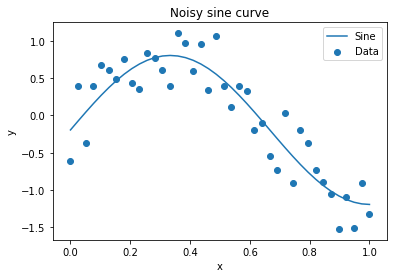

In [3]:
# Simulated dataset
x = np.linspace(0, 1, 40)
noise = np.random.uniform(size=40)
y = np.sin(x * 1.5 * np.pi) 
y_noise = (y + noise).reshape(-1, 1)

# Center y
y_noise -= y_noise.mean()

# Design matrix
X = np.vstack([2 * x, x ** 2]).T

# Normalize X
X = X / np.linalg.norm(X, axis=0)

# Plot
plt.scatter(x, y_noise, label='Data')
plt.plot(x, y - y.mean(), label='Sine')
plt.title('Noisy sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

Text(0.5, 0.98, 'Cost function and gradient descent: no regularization')

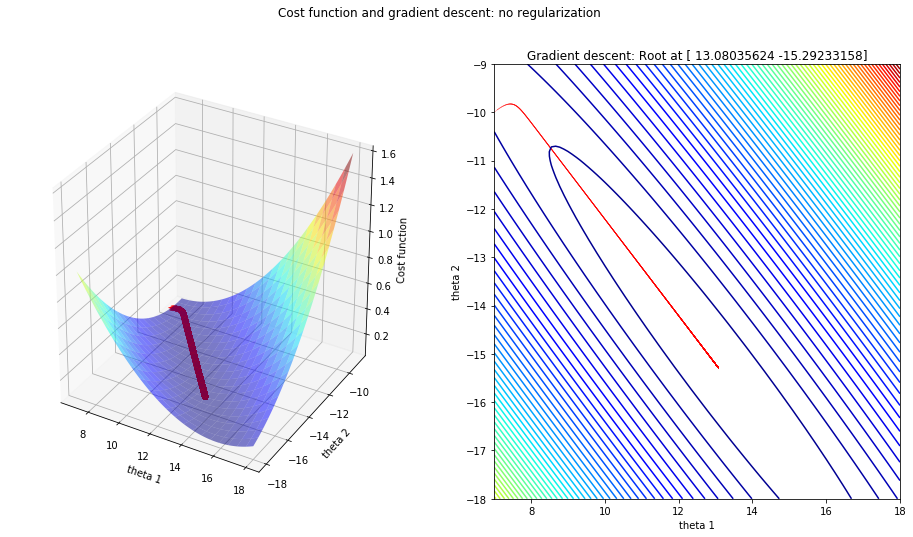

In [4]:
# Plot cost function w/o regularization

# Meshgrid of theta values
theta0, theta1 = np.meshgrid(np.linspace(7, 18, 100), np.linspace(-18, -9, 100))

# Compute cost function for each theta combination to array
zz = np.array([cost_function(X, y_noise.reshape(-1, 1), np.array([theta0, theta1]).reshape(-1, 1)) 
               for theta0, theta1 in zip(np.ravel(theta0), np.ravel(theta1))])

# Reshape cost function values  
Z = zz.reshape(theta0.shape)

# Compute cost function and parameters values w/ gradient descent
theta_result, J_history, theta_0, theta_1 = gradient_descent(X, y_noise, np.array([7, -10]).reshape(-1, 1),
                                                             alpha=1, num_iters=5000)

# Angles for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

# Plot
fig = plt.figure(figsize=(16, 8))

#Surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(theta0, theta1, Z, rstride=5, cstride=5, cmap='jet', alpha=0.5)
ax.plot(theta_0, theta_1, J_history, marker='*', color='r', alpha=0.4, label='Gradient descent') # plot path

ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_zlabel('Cost function')

# Contour
ax = fig.add_subplot(1, 2, 2)
ax.contour(theta0, theta1, Z, 70, cmap='jet') # 71 contour lines
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units='xy', angles='xy',
          scale=1, color='r', alpha=0.9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))

plt.suptitle('Cost function and gradient descent: no regularization')

Text(0.5, 0.98, 'Cost function and gradient descent: Ridge regularization')

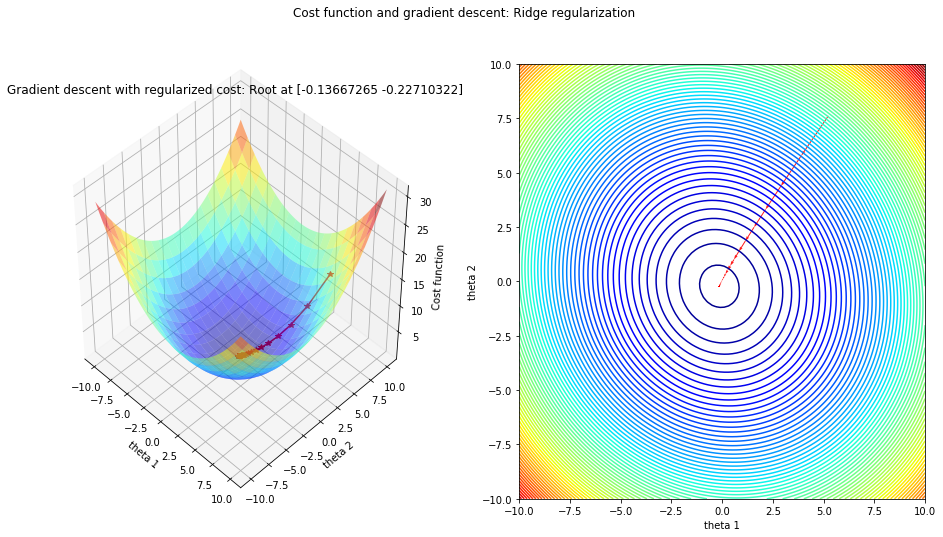

In [5]:
# Plot cost function with regularization

lam = 10

# Meshgrid of theta values
theta0, theta1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# Compute cost function for each theta combination to array
zz = np.array([cost_function_reg(X, y_noise.reshape(-1, 1), np.array([theta0, theta1]).reshape(-1, 1), lam)
               for theta0, theta1 in zip(np.ravel(theta0), np.ravel(theta1))])

Z = zz.reshape(theta0.shape)

# Compute cost function and parameters values w/ gradient descent
theta_result_reg, J_history_reg, theta_0, theta_1 = gradient_descent_reg(X, y_noise,
                            np.array([7., 10.]).reshape(-1, 1), 0.8, lam, num_iters=5000)

# Angles for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

fig = plt.figure(figsize = (16, 8))

# Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Surface
ax.plot_surface(theta0, theta1, Z, rstride=5, cstride=5, cmap='jet', alpha=0.5)
ax.plot(theta_0, theta_1, J_history_reg, marker='*', color='r', label='Gradient descent')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent with regularized cost: Root at {}'.format(theta_result_reg.ravel()))
ax.view_init(45, -45)

#Contour
ax = fig.add_subplot(1, 2, 2)
ax.contour(theta0, theta1, Z, 100, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units='xy', angles='xy',
          scale=1, color='r', alpha=0.9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

plt.suptitle('Cost function and gradient descent: Ridge regularization')